In [3]:
from scipy.stats import multivariate_normal as mvn
import numpy as np

def normalize(xs, axis=None):
    """Return normalized marirx so that sum of row or column (default) entries = 1."""
    if axis is None:
        return xs/xs.sum()
    elif axis==0:
        return xs/xs.sum(0)
    else:
        return xs/xs.sum(1)[:, None]

def mix_mvn_pdf(xs, pis, mus, sigmas):
    return np.array([pi*mvn(mu, sigma).pdf(xs) for (pi, mu, sigma) in zip(pis, mus, sigmas)])

In [67]:
# N component = 1

In [42]:
import numpy as np
import math
from scipy.stats import norm

def em_gmm_orig(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n = len(xs)  # Number of data points
    k = len(pis)  # Number of components in the mixture

    ll_old = 0
    for _ in range(max_iter):
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(k):
            ws[j, :] = pis[j] * norm.pdf(xs, mus[j], np.sqrt(sigmas[j]))
        ws /= ws.sum(0)

        # M-step
        pis = ws.mean(axis=1)

        mus = np.zeros(k)
        for j in range(k):
            mus[j] = np.sum(ws[j] * xs) / ws[j].sum()

        sigmas = np.zeros(k)
        for j in range(k):
            sigmas[j] = np.sum(ws[j] * (xs - mus[j]) ** 2) / ws[j].sum()

        # update complete log likelihood
        ll_new = 0.0
        for i in range(n):
            s = 0
            for j in range(k):
                s += pis[j] * norm.pdf(xs[i], mus[j], np.sqrt(sigmas[j]))
            ll_new += np.log(s)

        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return ll_new, pis, mus, sigmas

# Given data
xs = np.array([363, 524, 294, 329, 601, 589, 552, 619, 581, 567, 550, 599, 592, 593, 401, 435, 185, 190, 314, 377, 182, 442, 206, 245, 518, 401, 254, 340, 164])

# Initial parameters
pis = np.array([1])  # Initial mixture coefficients
mus = np.array([500])  # Initial means
sigmas = np.array([100])  # Initial variances

# Call the EM algorithm
ll, pis, mus, sigmas = em_gmm_orig(xs, pis, mus, sigmas)

print("Log Likelihood:", ll)
print("Updated mixture coefficients:", pis)
print("Updated means:", mus)
print("Updated variances:", sigmas)
print("Updated sigma:", math.sqrt(sigmas))


Log Likelihood: -186.97760493647192
Updated mixture coefficients: [1.]
Updated means: [414.03448276]
Updated variances: [23321.48156956]
Updated sigma: 152.71372423446442


In [ ]:
# N component = 2

Log Likelihood: -178.19749826993205
Updated mixture coefficients: [0.60291393 0.39708607]
Updated means: [307.72223698 575.45322653]
Updated variances: [9649.23915497  863.87237139]
Updated sigma: 98.23054084636098 29.39170582641993


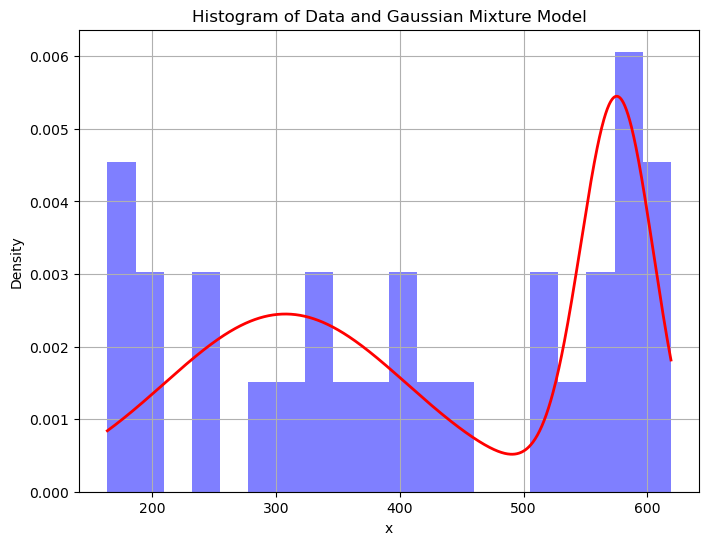

In [56]:
import matplotlib.pyplot as plt

# Given data
xs = np.array([363, 524, 294, 329, 601, 589, 552, 619, 581, 567, 550, 599, 592, 593, 401, 435, 185, 190, 314, 377, 182, 442, 206, 245, 518, 401, 254, 340, 164])

# EM algorithm outputs
pis1 = pis  # Updated mixture coefficients
mus1 = mus  # Updated means
sigmas1 = sigmas  # Updated variances

# Plotting
intervals = 1001  # Increase intervals for smoother contour plot
ys = np.linspace(np.min(xs), np.max(xs), intervals)  # Adjust the range based on data
z = np.zeros(intervals)

for pi, mu, sigma in zip(pis1, mus1, sigmas1):
    z += pi * norm.pdf(ys, mu, np.sqrt(sigma))

plt.figure(figsize=(8, 6))
plt.hist(xs, bins=40, density=True, alpha=0.5, color='b')  # Plot histogram of data
plt.plot(ys, z, 'r-', linewidth=2)  # Plot the Gaussian mixture model
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Data and Gaussian Mixture Model')
plt.grid(True)
plt.show()


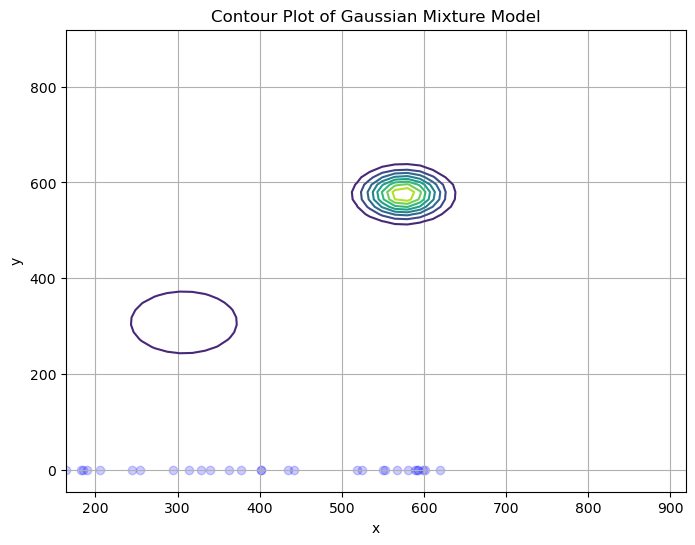

In [66]:
import matplotlib.pyplot as plt

# Given data
xs = np.array([363, 524, 294, 329, 601, 589, 552, 619, 581, 567, 550, 599, 592, 593, 401, 435, 185, 190, 314, 377, 182, 442, 206, 245, 518, 401, 254, 340, 164])

# EM algorithm outputs
pis1 = pis  # Updated mixture coefficients
mus1 = mus  # Updated means
sigmas1 = sigmas  # Updated variances

# Plotting
intervals = 50
ys = np.linspace(np.min(xs), np.max(xs)+300, intervals)  # Adjust the range based on data
X, Y = np.meshgrid(ys, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis1, mus1, sigmas1):
    z += pi * norm.pdf(_ys[:, 0], mu, np.sqrt(sigma)) * norm.pdf(_ys[:, 1], mu, np.sqrt(sigma))
z = z.reshape((intervals, intervals))

plt.figure(figsize=(8, 6))
plt.scatter(xs, np.zeros_like(xs), alpha=0.2, color='b')  # Plot data points
plt.contour(X, Y, z, levels=10, cmap='viridis')  # Draw contours
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of Gaussian Mixture Model')
plt.grid(True)
plt.show()


In [ ]:


intervals = 101
ys = np.linspace(0,600,intervals)
X, Y = np.meshgrid(ys, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis1, mus1, sigmas1):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

ax = plt.subplot(111)
plt.scatter(xs[:,0], xs[:,1], alpha=0.2)
plt.contour(X, Y, z, N=10)
plt.axis([-8,6,-6,8])
ax.axes.set_aspect('equal')
plt.tight_layout()



In [ ]:
# N component = 3

In [45]:
import numpy as np
import math
from scipy.stats import norm

def em_gmm_orig(xs, pis, mus, sigmas, tol=0.01, max_iter=100):

    n = len(xs)  # Number of data points
    k = len(pis)  # Number of components in the mixture

    ll_old = 0
    for _ in range(max_iter):
        ll_new = 0

        # E-step
        ws = np.zeros((k, n))
        for j in range(k):
            ws[j, :] = pis[j] * norm.pdf(xs, mus[j], np.sqrt(sigmas[j]))
        ws /= ws.sum(0)

        # M-step
        pis = ws.mean(axis=1)

        mus = np.zeros(k)
        for j in range(k):
            mus[j] = np.sum(ws[j] * xs) / ws[j].sum()

        sigmas = np.zeros(k)
        for j in range(k):
            sigmas[j] = np.sum(ws[j] * (xs - mus[j]) ** 2) / ws[j].sum()

        # update complete log likelihood
        ll_new = 0.0
        for i in range(n):
            s = 0
            for j in range(k):
                s += pis[j] * norm.pdf(xs[i], mus[j], np.sqrt(sigmas[j]))
            ll_new += np.log(s)

        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new

    return ll_new, pis, mus, sigmas

# Given data
xs = np.array([363, 524, 294, 329, 601, 589, 552, 619, 581, 567, 550, 599, 592, 593, 401, 435, 185, 190, 314, 377, 182, 442, 206, 245, 518, 401, 254, 340, 164])

# Initial parameters
pis = np.array([0.5, 0.5,0.5])  # Initial mixture coefficients
mus = np.array([200, 300,500])  # Initial means
sigmas = np.array([100, 100,100])  # Initial variances

# Call the EM algorithm
ll, pis, mus, sigmas = em_gmm_orig(xs, pis, mus, sigmas)

print("Log Likelihood:", ll)
print("Updated mixture coefficients:", pis)
print("Updated means:", mus)
print("Updated variances:", sigmas)
print("Updated sigma:", math.sqrt(sigmas[0]),math.sqrt(sigmas[1]),math.sqrt(sigmas[2]))


Log Likelihood: -174.31993973308533
Updated mixture coefficients: [0.16224989 0.43123332 0.40651679]
Updated means: [184.88018036 348.88381074 574.60693939]
Updated variances: [ 175.44017377 4864.64268392  893.8260907 ]
Updated sigma: 13.245383111574958 69.74699050084328 29.896924435430158


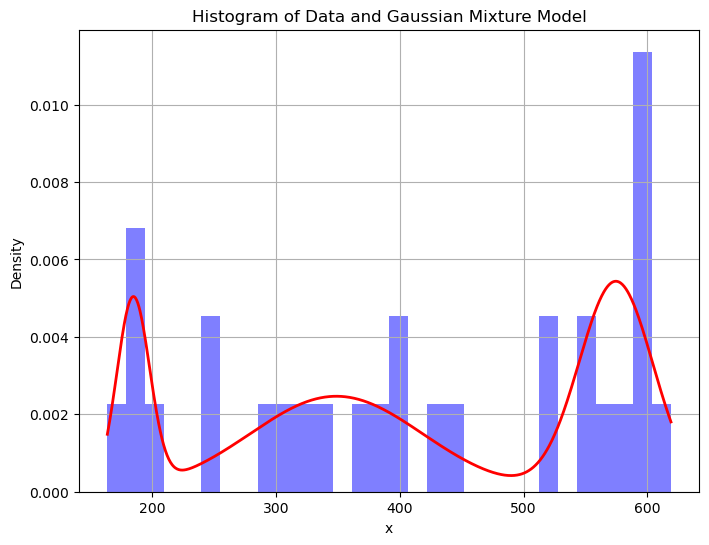

In [29]:
import matplotlib.pyplot as plt

# Given data
xs = np.array([363, 524, 294, 329, 601, 589, 552, 619, 581, 567, 550, 599, 592, 593, 401, 435, 185, 190, 314, 377, 182, 442, 206, 245, 518, 401, 254, 340, 164])

# EM algorithm outputs
pis1 = pis  # Updated mixture coefficients
mus1 = mus  # Updated means
sigmas1 = sigmas  # Updated variances

# Plotting
intervals = 1001  # Increase intervals for smoother contour plot
ys = np.linspace(np.min(xs), np.max(xs), intervals)  # Adjust the range based on data
z = np.zeros(intervals)

for pi, mu, sigma in zip(pis1, mus1, sigmas1):
    z += pi * norm.pdf(ys, mu, np.sqrt(sigma))

plt.figure(figsize=(8, 6))
plt.hist(xs, bins=30, density=True, alpha=0.5, color='b')  # Plot histogram of data
plt.plot(ys, z, 'r-', linewidth=2)  # Plot the Gaussian mixture model
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Data and Gaussian Mixture Model')
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
intervals = 101
ys = np.linspace(-8,8,intervals)
X, Y = np.meshgrid(ys, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis1, mus1, sigmas1):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

ax = plt.subplot(111)
plt.scatter(xs[:,0], xs[:,1], alpha=0.2)
plt.contour(X, Y, z, N=10)
plt.axis([-8,6,-6,8])
ax.axes.set_aspect('equal')
plt.tight_layout()